## Linear regression

Upload the dataset iris and consider the variables Sepal Length and Petal Length
1. Make a scatter plot that can help visualize any relationship between the
response variable y=Sepal Length and the explanatory variable x=Petal Length
2. Fit a polynomial of degree one to the dataset in 1. (i.e. $y = c_0 + c_1x$)
What is the interpretation of the coefficient c0 and c1? Plot scatterplot and outcome of linear regression. Formally, which predictors have a significant, at the 5% confidence level, influence on the response? Motivate your answer.
3. Compute the 95% confidence interval for the slope in the linear regression
model that expresses the Sepal.Length as a linear function of the Petal.Length.
4. Now fit a polynomial of degree 2 as $y = c_0 + c_1x + c_2x^2$ . Plot scatterplot and outcome of linear regression.
5. Compute the Akaike information criterion (AIC) of the two models.
What model do you prefer?

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [70]:
from sklearn.datasets import load_iris
iris=pd.DataFrame(load_iris()['data'])
iris.columns=load_iris()['feature_names']

In [71]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 1.

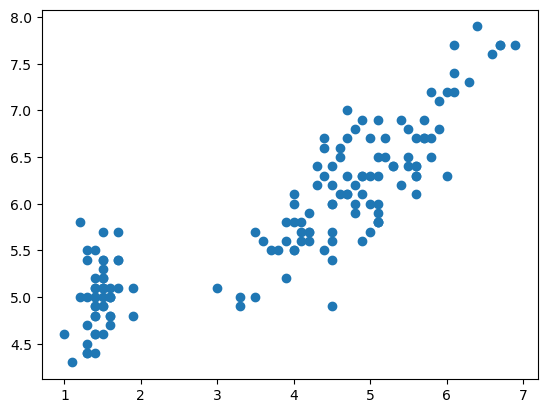

In [72]:
plt.scatter(iris['petal length (cm)'], iris['sepal length (cm)'])
plt.show()

### 2.

In [73]:
lm1 = sm.OLS(iris['sepal length (cm)'],sm.add_constant(iris['petal length (cm)'])).fit()

In [74]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:      sepal length (cm)   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     468.6
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           1.04e-47
Time:                        17:47:40   Log-Likelihood:                -77.020
No. Observations:                 150   AIC:                             158.0
Df Residuals:                     148   BIC:                             164.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.3066      0.07

$c_0$ is the intercept and tells us that when `petal length (cm)` is zero (small realistically), the quantity `sepal length (cm)` is $\sim 4.3$ cm. $c_1$ is the slope of the line and since is positive, its tells us that the two plotted quantity are positively correlated.

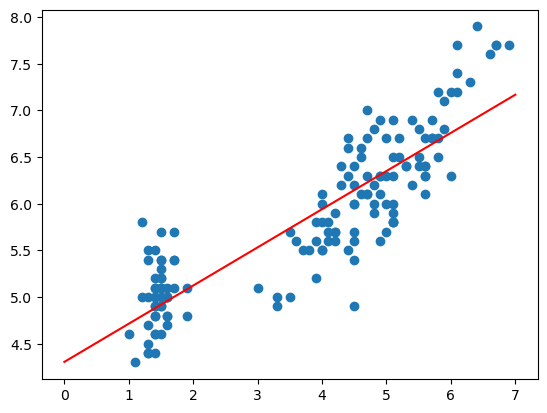

In [75]:
plt.scatter(iris['petal length (cm)'], iris['sepal length (cm)'])
plt.plot(np.linspace(0,7,100), lm1.params.iloc[0] + lm1.params.iloc[1]*np.linspace(0,7,100), c = 'red')
plt.show()

or analogously

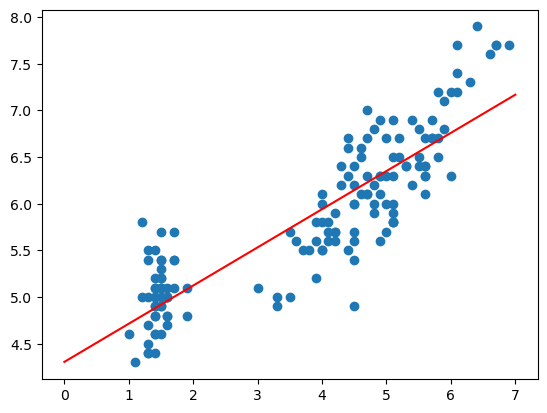

In [77]:
plt.scatter(iris['petal length (cm)'], iris['sepal length (cm)'])
plt.plot(np.linspace(0,7,100), lm1.predict(sm.add_constant(np.linspace(0,7,100))), c='red')
plt.show()

Both predictors are statistically significant (with confidence level at $95$%) since the p-value associated with the t-statistic is in both cases smaller than $0.05$.

### 3.

The confidence interval for the slope is already shown in the `lm1.summary()` command above.

In [86]:
lm1.conf_int() # The argument is 1 - confidence_level (e.g. 0.05 for 95% confidence level)

,0,1
const,4.151697,4.461510
petal length (cm),0.371591,0.446254


### 4.

In [23]:
lm2 = sm.OLS(iris['sepal length (cm)'], np.vander(iris['petal length (cm)'], 3, increasing=True)).fit()

In [24]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:      sepal length (cm)   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     312.3
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           1.19e-53
Time:                        11:01:38   Log-Likelihood:                -59.692
No. Observations:                 150   AIC:                             125.4
Df Residuals:                     147   BIC:                             134.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0583      0.140     36.038      0.0

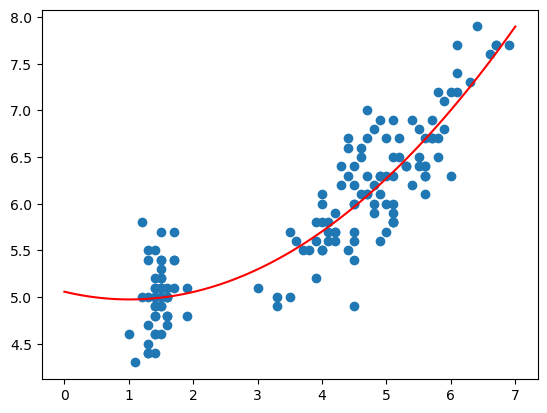

In [25]:
plt.scatter(iris['petal length (cm)'], iris['sepal length (cm)'])
plt.plot(np.linspace(0,7,100), lm2.params.iloc[0] + lm2.params.iloc[1]*np.linspace(0,7,100) + lm2.params.iloc[2]*np.linspace(0,7,100)**2, c = 'red')
plt.show()

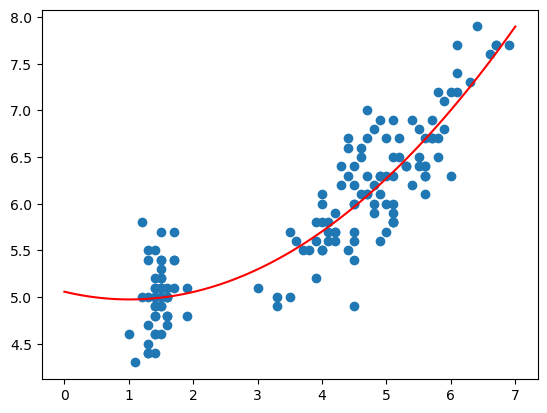

In [90]:
plt.scatter(iris['petal length (cm)'], iris['sepal length (cm)'])
plt.plot(np.linspace(0,7,100), lm2.predict(np.vander(np.linspace(0,7,100), 3, increasing = True)), c='red')
plt.show()

### 5.

The Akaike information criterion is already computed in the summaries above. We can interpret here the results. The AIC for the 2 regressors model is $AIC = 158$ while for the 3 regressors one is $AIC = 125.4$. Therefore the second model (3 regressors) has to be preferred having a lower AIC value.

## Logistic regression

A dataset (heart_data.csv) has been collected to study the probability of a heart disease in relation to people habits and financial situation. To this end, the dependent binary variable (y) reflects the state of health: y = 1 means that the subject suffered and heart disease, while y = 0 indicates that the subject is in good health.
1-Is this a regression or classification problem?
The following predictor variables were used for the analysis:
-'coffee_drinker' is a binary variable indicating if the subject drinks coffee (x1 = 1) or not (x1 = 0).
-'fast_food_spend' indicates the money spent for fast food during the year of analysis.
-'income' indicates the net income per year.
Answer the following points.
2-logistic regression model for this case.
3-Look at the output of the logistic regression model. Formally, which predictors have a significant, at the 95% confidence level, influence on the response? Motivate your answer.
4-Estimate the probability for y = 1 with X_test1=[1,0,1589,25489] and X_test2=[1,1,5589,4489].
What would be your prediction for y in these cases?

### 1.

It's a classification problem since the aim of the analysis is to predict the state of health of patients (categorical binary data) beased on the their habits

### 2.

In [27]:
import pandas as pd
import statsmodels.api as sm

In [29]:
heart_df = pd.read_csv('heart_data.csv')
heart_df.head()

,heart_disease,coffee_drinker,fast_food_spend,income
0,0,0,1823.816238,44361.62507
1,0,1,2042.951017,12106.13470
2,0,0,2683.872910,31767.13895
3,0,0,1323.126512,35704.49394
4,0,0,1964.139707,38463.49588


In [32]:
logit_m = sm.Logit(heart_df['heart_disease'], sm.add_constant(heart_df[['coffee_drinker','fast_food_spend','income']])).fit()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


In [34]:
print(logit_m.summary())

                           Logit Regression Results                           
Dep. Variable:          heart_disease   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Sun, 09 Feb 2025   Pseudo R-squ.:                  0.4619
Time:                        15:23:37   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -10.8690      0.492    -22.079      0.000     -11.834      -9.904
coffee_drinker     -0.6468      0.236     -2.738      0.006      -1.110      -0.184
fast_food_spend     0.0023   9.2

### 3.

All predictors have significance at $95$% confidence level except for `income` which has a p-value associated with the t-statistic of $0.712$ and therefore for such regressor we cannot reject the null hypothesis of zero coefficient.

### 4.

In [35]:
X_test1 = [1,0,1589,25489]
X_test2 = [1,1,5589,4489]

In [36]:
logit_m.predict(X_test1)

array([0.0007877])

The above result $0.0007877$ is smaller than $0.5$ so the prediction for `X_test1` is $y=0$

In [37]:
logit_m.predict(X_test2)

array([0.78956865])

The above result $0.7896$ is greater than $0.5$ so the prediction for `X_test2` is $y=1$

## Test (kolmogorov-smirnov)

Given the dataset hsb2.csv, compute the standard error and confidence interval for the correlation between write and math. Use bootstrap with a number of bootstrap samples equal to 500. Choose a confidence level of 95%

Given the dataset 'distr_sample.csv', each column represents a different sample.
Test (Kolmogorov-Smirnov test) if they are one of the following:
- norm: args=(10,5)
- geom: args=(0.8,5)
- uniform
- lognorm: args=(4,6,2)

Test (Kolmogorov-Smirnov test) if 'var1' and 'var3' or 'var2' and 'var5' are from the same distribution. Choose a confidence level of 95%

In [44]:
import pandas as pd
from scipy import stats
import numpy as np
from random import choices

In [39]:
hsb2_df = pd.read_csv('hsb2.csv')
hsb2_df.head()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
0,70,0,4,1,1,1,57,52,41,47,57
1,121,1,4,2,1,3,68,59,53,63,61
2,86,0,4,3,1,1,44,33,54,58,31
3,141,0,4,3,1,3,63,44,47,53,56
4,172,0,4,2,1,2,47,52,57,53,61


In [43]:
stats.pearsonr(hsb2_df['write'], hsb2_df['math'])

PearsonRResult(statistic=0.6174492644854919, pvalue=2.086664741687138e-22)

In [ ]:
nboot = 500

corrs = []

for i in range(nboot):
    index = np.random.choice(np.arange(len(hsb2_df)), size = len(hsb2_df))
    write_i = hsb2_df['write'][index]
    math_i = hsb2_df['math'][index]
    corrs.append(stats.pearsonr(write_i, math_i)[0])

print('standard error: ', np.std(corrs, ddof=1)/np.sqrt(nboot))
print('confidence interval: ', np.quantile(corrs, [0.025, 0.975]))

standard error:  0.0017830990004866778
confidence interval:  [0.53553549 0.69894561]


In [52]:
distr_df = pd.read_csv('distr_sample.csv', index_col=0).reset_index(drop=True)
distr_df.head()

,var1,var2,var3,var4,var5
0,20.585149,0.417411,10.065009,6,0.111197
1,7.150377,0.222108,17.267670,6,0.492625
2,32.679656,0.119865,8.676716,6,0.011354
3,890.715926,0.337615,23.600846,6,0.468661
4,6.783906,0.942910,13.128337,7,0.056303


In [63]:
for i in range(5):
    print(distr_df.columns[i], '<-> norm (10,5)', '   pvalue: ', stats.kstest(distr_df.iloc[:, i], 'norm', args=(10,5)).pvalue)

var1 <-> norm (10,5)    pvalue:  2.9825442476471197e-05
var2 <-> norm (10,5)    pvalue:  3.742064972863079e-145
var3 <-> norm (10,5)    pvalue:  0.8224967415773926
var4 <-> norm (10,5)    pvalue:  2.705109596688789e-47
var5 <-> norm (10,5)    pvalue:  6.946227346532304e-145


Only the result of `var3` seems to be statistically non significant. This is the only variable for which we cannot reject the null hypotesis of normal distribution with args = (10,5)

In [64]:
for i in range(5):
    print(distr_df.columns[i], '<-> geom (0.8,5)', '   pvalue: ', stats.kstest(distr_df.iloc[:, i], 'geom', args=(0.8,5)).pvalue)

var1 <-> geom (0.8,5)    pvalue:  2.1482695735465203e-69
var2 <-> geom (0.8,5)    pvalue:  0.0
var3 <-> geom (0.8,5)    pvalue:  8.345759213559685e-42
var4 <-> geom (0.8,5)    pvalue:  2.1482695735465203e-69
var5 <-> geom (0.8,5)    pvalue:  0.0


All of the results are statistically significant. For each variable we reject the null hypothesis of geometric distribution with args = (0.8,5)

In [65]:
for i in range(5):
    print(distr_df.columns[i], '<-> uniform', '   pvalue: ', stats.kstest(distr_df.iloc[:, i], 'uniform').pvalue)

var1 <-> uniform    pvalue:  0.0
var2 <-> uniform    pvalue:  0.6472428284685623
var3 <-> uniform    pvalue:  1.0307550414641265e-152
var4 <-> uniform    pvalue:  0.0
var5 <-> uniform    pvalue:  0.10054203446371712


Here the results for variables `var2` and `var5` are non statistically significant. For these variables we cannot reject the null hypothesis of uniform distribution

In [66]:
for i in range(5):
    print(distr_df.columns[i], '<-> lognorm (4,6,2)', '   pvalue: ', stats.kstest(distr_df.iloc[:, i], 'lognorm', args=(4,6,2)).pvalue)

var1 <-> lognorm (4,6,2)    pvalue:  0.21805553378516207
var2 <-> lognorm (4,6,2)    pvalue:  0.0
var3 <-> lognorm (4,6,2)    pvalue:  1.256720923229672e-07
var4 <-> lognorm (4,6,2)    pvalue:  1.0676343025998959e-58
var5 <-> lognorm (4,6,2)    pvalue:  0.0


Only the result for `var1` is statistically non significant. For this variable we cannot reject the null hypothesis of lognorm distribution with args = (4,6,2)

In [67]:
stats.kstest(distr_df['var1'], distr_df['var3'])

KstestResult(statistic=0.23, pvalue=0.009878183186176536, statistic_location=5.766031409657975, statistic_sign=-1)

Here we reject the null hypothesis that `var1` and `var3` are generated by the same distribution.

In [68]:
stats.kstest(distr_df['var2'], distr_df['var5'])

KstestResult(statistic=0.16, pvalue=0.1548386665118475, statistic_location=0.3677831327192532, statistic_sign=1)

Here we cannot reject the null hypothesis that `var2` and `var5` are generated by the same distribution.

## Bootstrap

Consider the bootstrapped correlation between fast_food_spend and income and the bootstrapped variance of the variable coffee_drinker with a number of bootstrap samples equal to 500. Compute the confidence interval, with a confidence level of 95%

In [19]:
import pandas as pd
from random import choices
from scipy import stats
import numpy as np

In [20]:
df = pd.read_csv('heart_data.csv')
df.head()

,heart_disease,coffee_drinker,fast_food_spend,income
0,0,0,1823.816238,44361.62507
1,0,1,2042.951017,12106.13470
2,0,0,2683.872910,31767.13895
3,0,0,1323.126512,35704.49394
4,0,0,1964.139707,38463.49588


In [21]:
len(df)

10000

In [25]:
stats.pearsonr(df['fast_food_spend'], df['income'])

PearsonRResult(statistic=-0.15224340058838828, pvalue=6.380440158362276e-53)

In [30]:
nboot = 500

corrs = []

for i in range(nboot):
    index = np.random.choice(np.arange(len(df)), size=len(df), replace=True)
    y1 = df['fast_food_spend'][index]
    y2 = df['income'][index]
    corrs.append(stats.pearsonr(y1, y2)[0])

print(np.percentile(corrs, [2.5, 97.5]))



[-0.17190389 -0.13325761]


In [31]:
var_l = []

for i in range(nboot):
    y = choices(df['coffee_drinker'], k = len(df))
    var_l.append(np.var(y))

print(np.percentile(var_l, [2.5, 97.5]))

[0.20345086 0.21123039]
